In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df_focus = pd.read_csv('focus_data1.csv')
df_focus['Label'] = 'Focus'
print(df_focus.shape)
df_focus.head()

(4012, 13)


,sample id,signal strength,attention,meditation,delta,theta,low alpha,high alpha,low beta,high beta,low gamma,high gamma,Label
0,0,0,43,24,1206278,265672,21107,26034,29475,23637,2606,4260,Focus
1,1,0,53,24,1944692,21849,14117,20710,22587,16060,1684,800,Focus
2,2,0,57,41,201577,14293,22495,12404,2927,10766,2449,765,Focus
3,3,0,63,38,2094265,151005,44266,96170,90397,59229,4427,2375,Focus
4,4,26,63,38,1372793,343369,13828,19185,44627,15760,6732,4246,Focus


In [3]:
df_baseline = pd.read_csv('baseline_data1.csv')
df_baseline['Label'] = 'Baseline'
print(df_baseline.shape)
df_baseline.head()

(1113, 13)


,sample id,signal strength,attention,meditation,delta,theta,low alpha,high alpha,low beta,high beta,low gamma,high gamma,Label
0,0,0,35,41,212177,26133,8204,3629,15773,13654,1233,1936,Baseline
1,1,0,43,38,188911,136176,11324,83150,67174,59769,29962,21841,Baseline
2,2,0,47,41,1440581,128553,25642,5959,7911,7259,6526,5769,Baseline
3,3,0,57,35,189726,81416,4313,8254,18221,16829,9028,5815,Baseline
4,4,0,48,38,243481,22360,8623,3328,7283,3529,1284,1621,Baseline


In [4]:
df_med = pd.read_csv('meditation_session1.csv', usecols=range(12))
df_med['Label'] = 'Meditation'

df_med.rename(columns={'high gamma0': 'high gamma'}, inplace=True)
print(df_med.shape)
df_med.head()

(1472, 13)


,sample id,signal strength,attention,meditation,delta,theta,low alpha,high alpha,low beta,high beta,low gamma,high gamma,Label
0,1,0,66,48,70253,23543,7656,10943,7381,3162,2316,694,Meditation
1,2,26,66,48,2374204,59988,18063,80174,112506,46381,8103,3724,Meditation
2,3,0,66,41,880716,95308,9688,12164,20548,5081,2436,2779,Meditation
3,4,0,60,47,843625,118471,26412,22971,15975,7815,14261,11308,Meditation
4,5,0,61,48,976948,294908,35645,174619,68719,87955,56805,19698,Meditation


In [5]:
# Combine the dataframes using concat
df = pd.concat([df_focus, df_baseline,df_med], ignore_index=True)

# Print the shape and the first few rows of the combined dataframe
print(df.shape)
df.head()

(6597, 13)


,sample id,signal strength,attention,meditation,delta,theta,low alpha,high alpha,low beta,high beta,low gamma,high gamma,Label
0,0,0,43,24,1206278,265672,21107,26034,29475,23637,2606,4260,Focus
1,1,0,53,24,1944692,21849,14117,20710,22587,16060,1684,800,Focus
2,2,0,57,41,201577,14293,22495,12404,2927,10766,2449,765,Focus
3,3,0,63,38,2094265,151005,44266,96170,90397,59229,4427,2375,Focus
4,4,26,63,38,1372793,343369,13828,19185,44627,15760,6732,4246,Focus


### CLASS COUNT

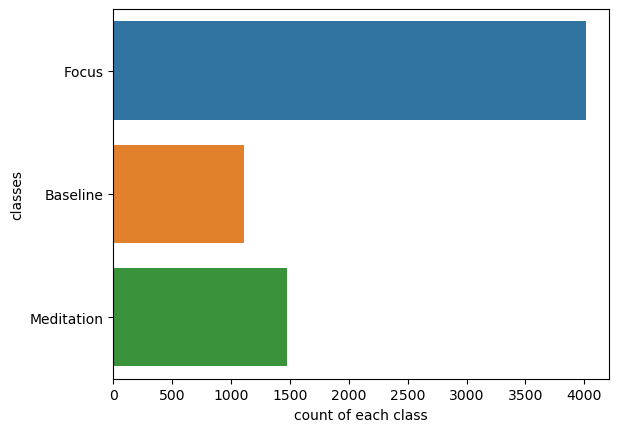

In [6]:
#Visualize Class Counts
sns.countplot(y=df.Label ,data=df) 
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [7]:
#in which column of our dataset is there at least a missing values?
df.isna().any()

sample id          False
signal strength    False
attention          False
meditation         False
delta              False
theta              False
low alpha          False
high alpha         False
low beta           False
high beta          False
low gamma          False
high gamma         False
Label              False
dtype: bool

In [8]:
#come trattiamo le variabili categoriche 
print(df.dtypes)

sample id           int64
signal strength     int64
attention           int64
meditation          int64
delta               int64
theta               int64
low alpha           int64
high alpha          int64
low beta            int64
high beta           int64
low gamma           int64
high gamma          int64
Label              object
dtype: object


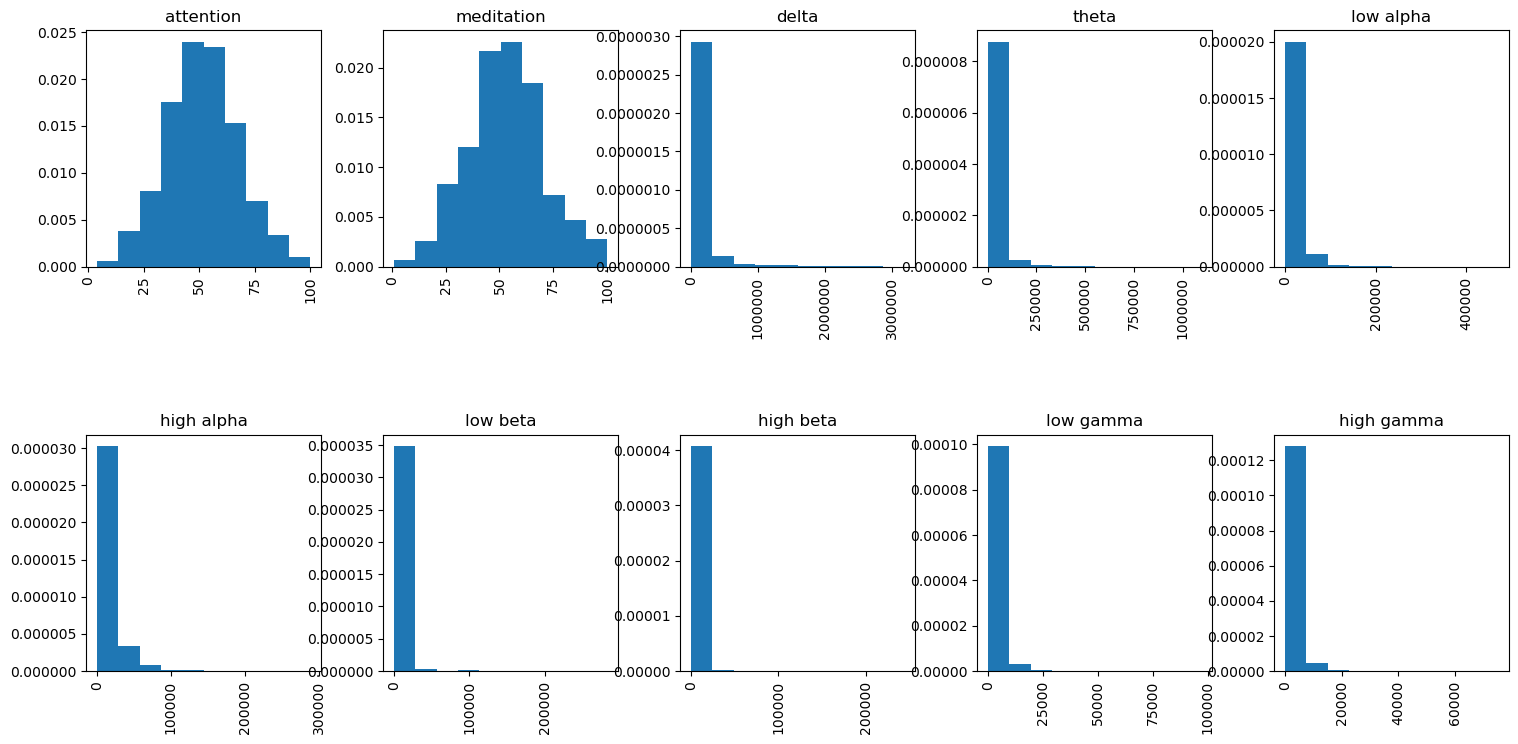

In [9]:
fig, axes = plt.subplots(2, 5,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)
columns = ['attention','meditation','delta','theta','low alpha','high alpha','low beta','high beta','low gamma','high gamma'];
num = df[columns];
i=0
for x in num.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist(num[x],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1
plt.show()

In [10]:
col_to_transform = ['delta', 'theta', 'low alpha', 'high alpha', 'low beta', 'high beta', 'low gamma', 'high gamma']
num[col_to_transform] = num[col_to_transform].astype(float)
num[col_to_transform] = num[col_to_transform].apply(lambda x: np.log(x + 1))


C:\Users\scrpa\.vscode\Anaconda\envs\AndreasEnv\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


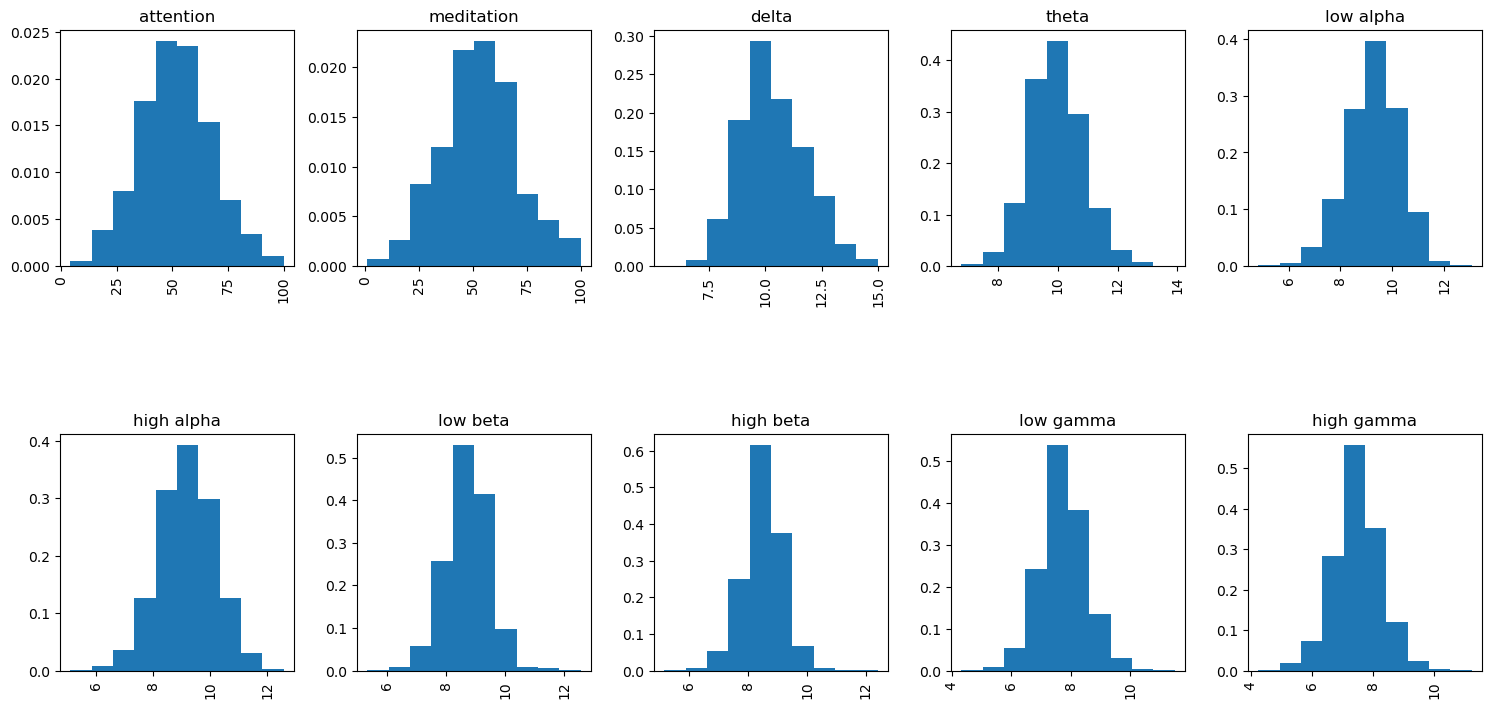

In [11]:
fig, axes = plt.subplots(2, 5,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)
i=0
for x in num.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist(num[x],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1

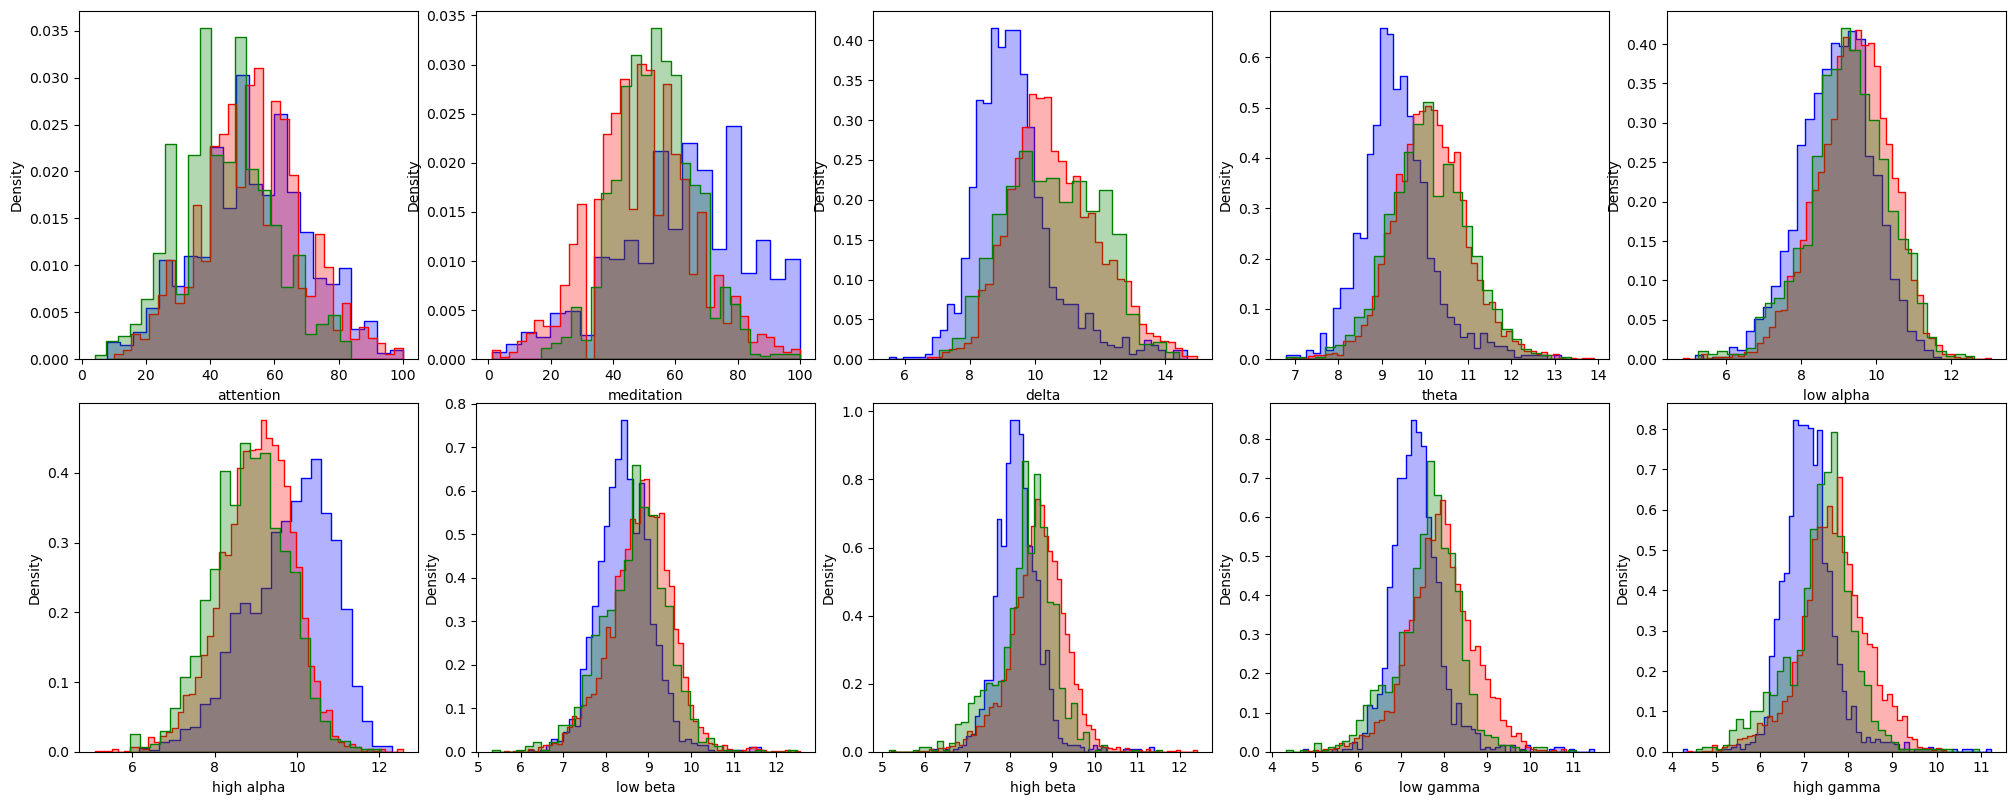

In [12]:
X0 = num[df['Label']=='Meditation']
X1 = num[df['Label']=='Focus']
X2 = num[df['Label']=='Baseline']

fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,8))
fig.tight_layout()

for i, ax in zip(range(num.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density',   element="step",  alpha=0.3)
    sns.histplot(X2.iloc[:,i], color="green", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()


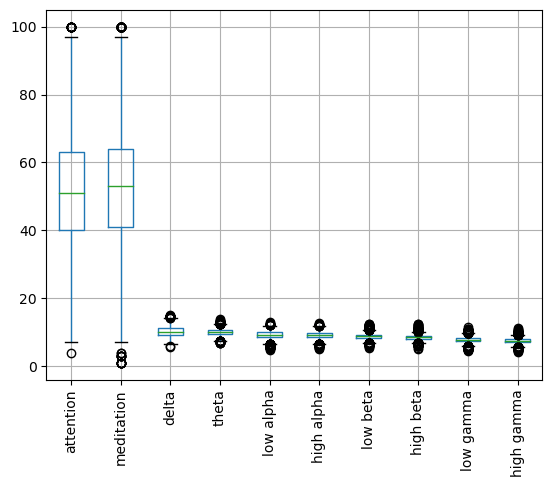

In [13]:
num.boxplot(rot=90)

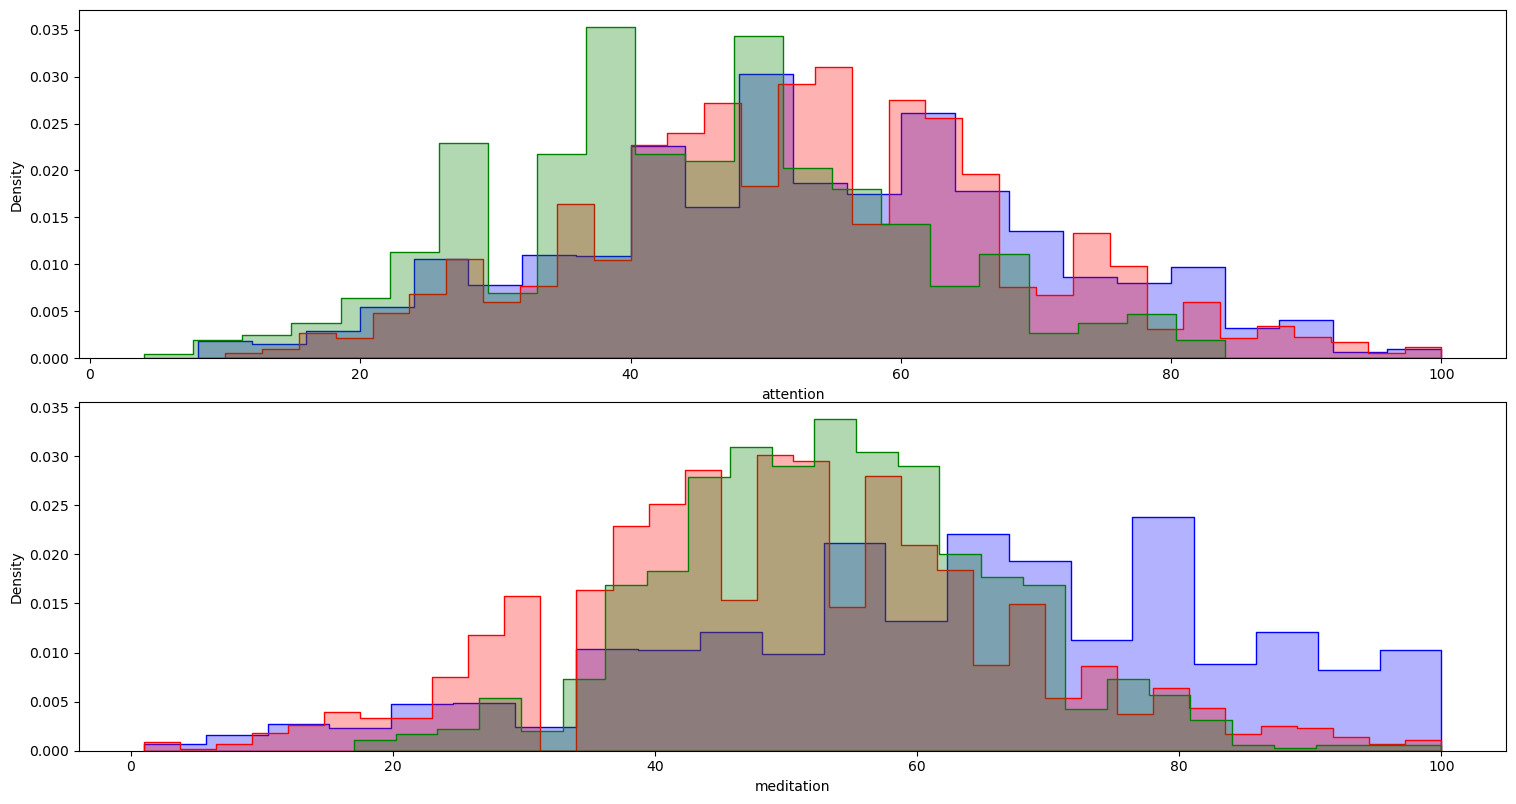

In [14]:
paramters = ['attention','meditation'];
par = df[paramters]
X0 = par[df['Label']=='Meditation']
X1 = par[df['Label']=='Focus']
X2 = par[df['Label']=='Baseline']

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15,8))
fig.tight_layout()

for i, ax in zip(range(par.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density',   element="step",  alpha=0.3)
    sns.histplot(X2.iloc[:,i], color="green", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

In [15]:
col= ['attention','meditation','delta', 'theta', 'low alpha', 'high alpha', 'low beta', 'high beta', 'low gamma', 'high gamma']
X=num[col]
print(X.shape)
X.tail()

(6597, 10)


,attention,meditation,delta,theta,low alpha,high alpha,low beta,high beta,low gamma,high gamma
6592,37,21,12.855587,12.326213,9.645753,10.763927,10.207842,9.488729,8.586159,8.810907
6593,35,8,13.381944,13.139533,9.423029,10.459812,10.378199,9.984975,9.815366,9.067047
6594,41,13,12.277449,11.220780,8.810460,9.684585,9.542518,9.429396,9.275379,8.193953
6595,38,8,14.335090,11.721848,11.114431,10.927753,9.700637,9.989803,10.608983,10.367787
6596,38,11,13.706888,11.181682,10.109526,8.333270,9.092345,8.327726,8.592301,8.416267


In [16]:
y=(df['Label'])
print(len(y))

6597


In [17]:
y

0            Focus
1            Focus
2            Focus
3            Focus
4            Focus
           ...    
6592    Meditation
6593    Meditation
6594    Meditation
6595    Meditation
6596    Meditation
Name: Label, Length: 6597, dtype: object

In [18]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30,   
                                                    stratify=y,        #preserve target propotions (probviamo non stratificata)
                                                    random_state= 321) #fix random seed for replicability


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [20]:
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1_macro', verbose=10, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    print("\n")
    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train, average='macro'), f1_score(y_test, y_pred, average='macro')))  
    print("\n")
    print(confusion_matrix(y_test, y_pred))
    return (f1_score(y_train, y_pred_train, average='macro'), f1_score(y_test, y_pred, average='macro'))

def roc(model,X_train,y_train,X_test,y_test):
    n_classes = len(np.unique(y_test))
    y_test_bin = label_binarize(y_test, classes=[*range(n_classes)])
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic to Multi-Class')
    plt.legend(loc="lower right")
    plt.show()

    return (fpr, tpr ,roc_auc)

In [21]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(12,6),(10,5),(24,12),(48,24)], 
              "max_iter": [1000, 2000],
              "alpha":    [0.1,0.5,1],
              "activation":['logistic', 'relu'],
              "learning_rate":['invscaling']}

NN_f1_train,NN_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
f1_train: 0.572172 using {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (48, 24), 'learning_rate': 'invscaling', 'max_iter': 1000}


f1         train 0.602   test 0.594


[[  52  275    7]
 [  57 1114   33]
 [   4  155  283]]


In [23]:
Mpl_model =  MLPClassifier(activation= 'relu', alpha= 0.1, hidden_layer_sizes=(48, 24), learning_rate='invscaling', max_iter= 1000)

In [28]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Mlp_model = MLPClassifier(activation= 'relu', alpha= 0.1, hidden_layer_sizes=(48, 24), learning_rate='invscaling', max_iter= 1000)

kf = KFold(n_splits=50)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    Mlp_model.fit(X_train, y_train)
    predictions = Mlp_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.45%
Accuracy: 92.42%
Accuracy: 95.45%
Accuracy: 90.91%
Accuracy: 94.70%
Accuracy: 86.36%
Accuracy: 96.21%
Accuracy: 90.15%
Accuracy: 95.45%
Accuracy: 96.21%
Accuracy: 94.70%
Accuracy: 95.45%
Accuracy: 97.73%
Accuracy: 56.82%
Accuracy: 85.61%
Accuracy: 71.97%
Accuracy: 75.00%
Accuracy: 71.97%
Accuracy: 90.15%
Accuracy: 99.24%
Accuracy: 95.45%
Accuracy: 98.48%
Accuracy: 97.73%
Accuracy: 95.45%
Accuracy: 78.79%
Accuracy: 96.97%
Accuracy: 98.48%
Accuracy: 84.85%
Accuracy: 93.94%
Accuracy: 94.70%
Accuracy: 42.42%
Accuracy: 9.85%
Accuracy: 0.76%
Accuracy: 0.00%
Accuracy: 2.27%
Accuracy: 6.82%
Accuracy: 2.27%
Accuracy: 12.12%
Accuracy: 2.27%
Accuracy: 75.00%
Accuracy: 54.55%
Accuracy: 72.73%
Accuracy: 71.21%
Accuracy: 73.48%
Accuracy: 63.64%
Accuracy: 83.33%
Accuracy: 62.12%
Accuracy: 77.86%
Accuracy: 48.85%
Accuracy: 65.65%


In [27]:
import pickle

Mlp_model = MLPClassifier(activation= 'relu', alpha= 0.1, hidden_layer_sizes=(48, 24), learning_rate='invscaling', max_iter= 1000)
Mlp_model.fit(X,y);
# Assuming the model has been trained
# Mlp_model.fit(X, y)

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(Mlp_model, file)